<a href="https://colab.research.google.com/github/loicpages/qmII_group_rep/blob/main/Final_Southern_Africa_Correlations_Food_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#importing data with pandas 
data_path = '/content/df_final_use.csv'
general_dfi = pd.read_csv(data_path, encoding ='latin-1', sep=';')
general_df = general_dfi.fillna(method='pad')
general_df.head()

,Country,Year,Food Availibility per capita (kg/cap/year),Production Quantity (Grains & Ce.+ Root Crops)(1000MT),Import Quantity (Grains & Ce.)(1000MT),Export Quantity (Grains & Ce.)(1000MT),Import Quantity (Root Crops)(1000MT),Export Quantity (Root Crops)(1000MT),Population (Million),Non-Cereal Food Aid (Grain Equiv. 1000MT),Cereal Food Aid (Grain Equiv. 1000MT),Imports (all)(1000MT),Exports (all)(1000MT),Production Quantity per capita (kg/cap/year),Imports (all) per capita (kg/cap/year),Exports (all) per capita (kg/cap/year),Production + net ex-imports (kg/cap/year),Total Food Aid,Total Food Aid per capita (kg/cap/year),Region
0,Afghanistan,1980.0,NaN,3933.805,17.10,0.0,0.0,0.0,14186.000,NaN,NaN,17.10,0.0,277.301917,1.205414,0.0,278.507331,NaN,NaN,Central and East Asia
1,Afghanistan,1981.0,NaN,3763.130,96.50,0.0,0.0,0.0,13.984,NaN,NaN,96.50,0.0,269.102546,6.900744,0.0,276.003289,NaN,NaN,Central and East Asia
2,Afghanistan,1982.0,NaN,3602.788,74.90,0.0,0.0,0.0,13673.000,NaN,NaN,74.90,0.0,263.496526,5.477949,0.0,268.974475,NaN,NaN,Central and East Asia
3,Afghanistan,1983.0,NaN,3474.450,79503.00,0.0,0.0,0.0,13.300,NaN,NaN,79503.00,0.0,261.236842,5.977669,0.0,267.214511,NaN,NaN,Central and East Asia
4,Afghanistan,1984.0,NaN,3306.778,21.15,0.0,0.0,0.0,12932.000,NaN,NaN,21.15,0.0,255.705073,1.635478,0.0,257.340551,NaN,NaN,Central and East Asia


In [3]:
#using function to create scatter plots for each country showing the relationship between two variables  
def plot_country(country, feature1, feature2, plot=True, show=True):
  country_feature1= general_df[general_df['Country']==country][feature1]
  df_feature1=pd.DataFrame(country_feature1)  

  country_feature2= general_df[general_df['Country']==country][feature2]
  df_feature2 =pd.DataFrame(country_feature2) 

  merged = df_feature1.merge(df_feature2, left_index=True, right_index=True)

  if plot:
    merged.plot(x=feature1, y=feature2, kind = 'scatter')
    plt.title(country)
  
  #adding a linear regression line 
  x=merged[feature1]
  y=merged[feature2]
  x= x.to_numpy()
  y= y.to_numpy()
  m, b = np.polyfit(x, y, 1)
  if plot:
    plt.plot(x, m*x+b, c='red')
  if show:
    print(country)
    print(m)
    print(b)
  
  #Calculating the R square value for each country 
  temp= np.corrcoef(x,y)
  temp[0,1]**2
  rS2=temp[0,1]**2
  if show:
    print(rS2)

  corr = merged.corr()
  return corr

Zimbabwe
3.0256183678178528
145.23371919033835
0.365568906031781
Zambia
1.533759537163787
167.69878118634483
0.18578530844703006
Swaziland
1.702986452737359
115.35278561724283
0.01337039738859208
Namibia
-0.46773956231668373
107.1992190222736
0.0213777172287112
Mozambique
8.956421933404561
155.35465224559314
0.45937410250476296
Malawi
4.174795435298767
205.98438623481184
0.28714902889459354
Madagascar
6.757967706385298
205.4415433305951
0.05805403327552275
Lesotho
2.247492888168521
89.79466006958627
0.027320696431134467


,Exports (all) per capita (kg/cap/year),Production Quantity per capita (kg/cap/year)
Exports (all) per capita (kg/cap/year),1.00000,0.16529
Production Quantity per capita (kg/cap/year),0.16529,1.00000


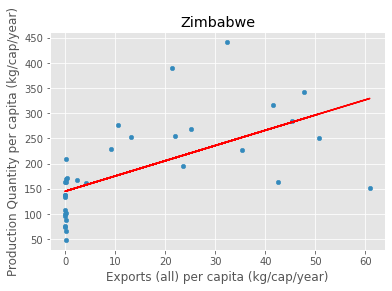

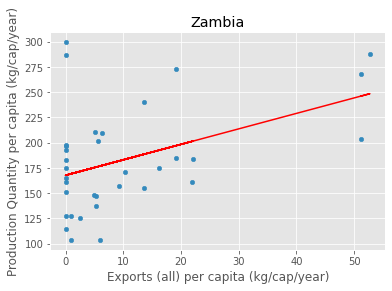

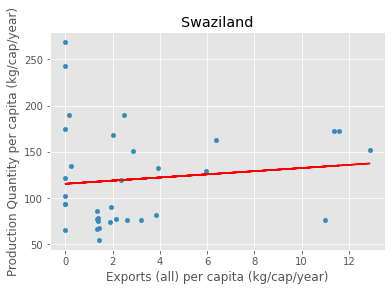

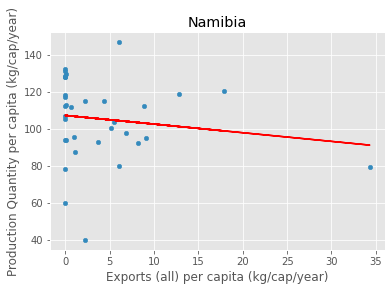

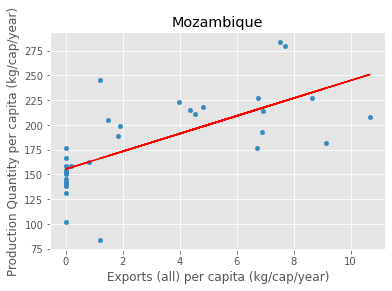

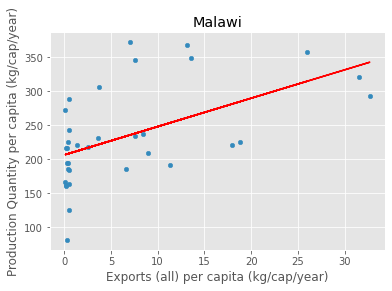

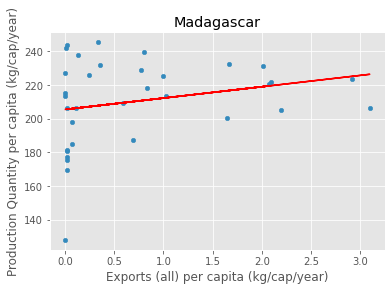

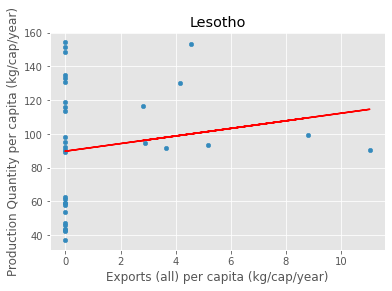

In [4]:
#calling the function for every country in Southern Africa, choosing food production per capita and food exports per capita as the arguments
#allows us to explore the relationship between food production per capita and food exports per capita  
plot_country('Zimbabwe','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Exports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')

In [5]:
#correlation coefficient between exports per capita and production per capita  
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Exports (all) per capita (kg/cap/year)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.604623
Exports (all) per capita (kg/cap/year)                                            0.604623                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.431028
Exports (all) per capita (kg/cap/year)                                            0.431028                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Exports (all) per capita (kg/cap/year)
Production Quantity per capita (kg/cap/year)             

Zimbabwe
-1.7539293985264424
255.24614293995043
0.46653858461575726
Zambia
-1.0970429240480313
212.13507217108153
0.227802539342358
Swaziland
-1.0787569446620366
221.0125720385417
0.2849478508660914
Namibia
-0.6119965949089693
154.12732840898272
0.3040401865560182
Mozambique
-0.6296109342540569
203.59019604789424
0.022505875704523476
Malawi
-2.4992397323509388
272.4446259683206
0.23554880668159794
Madagascar
-0.22535069530043086
214.22896218733024
0.0043085235688513105
Lesotho
-0.545716846598412
147.60958458597742
0.12951208866961825


,Imports (all) per capita (kg/cap/year),Production Quantity per capita (kg/cap/year)
Imports (all) per capita (kg/cap/year),1.000000,-0.359878
Production Quantity per capita (kg/cap/year),-0.359878,1.000000


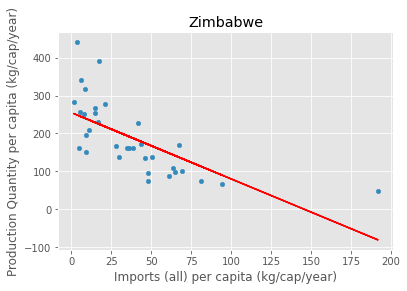

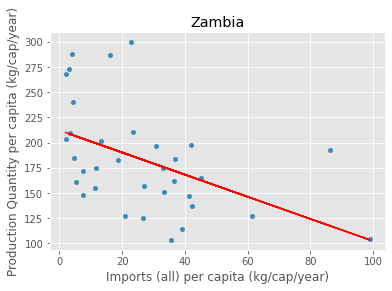

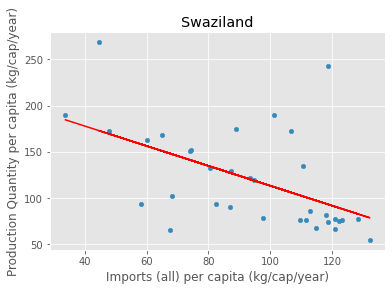

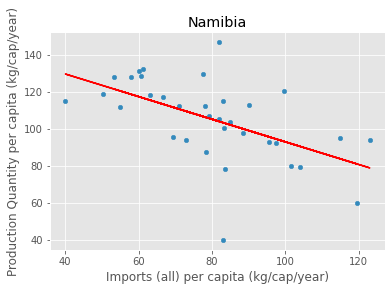

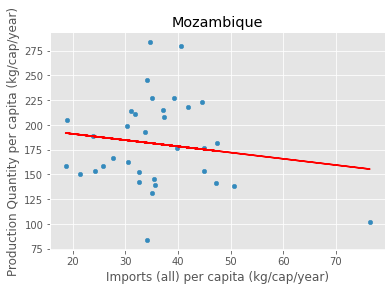

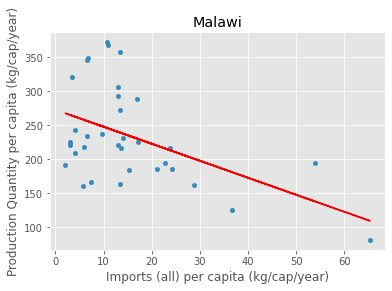

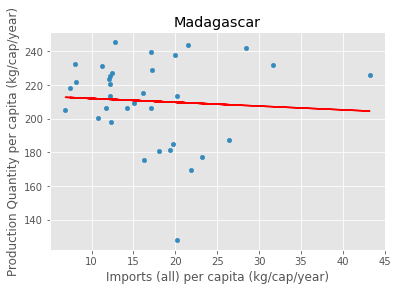

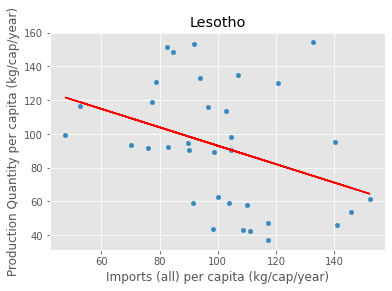

In [6]:
#calling the function for every country in Southern Africa, choosing food production per capita and food imports per capita as the arguments
#allows us to explore the relationship between food production per capita and food imports per capita 
plot_country('Zimbabwe','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Zambia','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Swaziland','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Namibia','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Mozambique','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Malawi','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Madagascar','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')
plot_country('Lesotho','Imports (all) per capita (kg/cap/year)','Production Quantity per capita (kg/cap/year)')

In [7]:
#correlation coefficient between imports per capita and production per capita 
countries = ['Zimbabwe', 'Zambia','Swaziland', 'Namibia', 'Mozambique','Malawi', 'Madagascar', 'Lesotho']

feature1= 'Production Quantity per capita (kg/cap/year)'
feature2= 'Import Quantity (Grains & Ce.)(1000MT)'

list_of_correlations = []

for country in countries : 
  corr = plot_country(country, feature1, feature2, False, False)
  list_of_correlations.append((country,corr))

for corr in list_of_correlations : 
  print(corr[0], corr[1])

Zimbabwe                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                               -0.057871
Import Quantity (Grains & Ce.)(1000MT)                                           -0.057871                                1.000000
Zambia                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)                                      1.000000                                0.264549
Import Quantity (Grains & Ce.)(1000MT)                                            0.264549                                1.000000
Swaziland                                               Production Quantity per capita (kg/cap/year)  Import Quantity (Grains & Ce.)(1000MT)
Production Quantity per capita (kg/cap/year)             